In [1]:
# - - codificação: latin-1 --

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dadosPopAbastecida = pd.read_csv('/content/drive/MyDrive/dadosSISAGUA/cadastro_populacao_abastecida/cadastro_populacao_abastecida.csv', sep=';' , encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,9,17,18,19,20,21,22,23,24,27,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dadosPopAbastecida

,Região Geográfica,UF,Regional de Saúde,Município,Código IBGE,Tipo da Instituição,Sigla da Instituição,Nome da Instituição,CNPJ da Instituição,Nome do escritório regional/local,CNPJ do escritório regional/local,Tipo da Forma de Abastecimento,Código Forma de abastecimento,Nome da Forma de Abastecimento,Ano de referência,Data de registro,Data de preenchimento,Carro Pipa,Chafariz,Fonte,Cisterna,Canalização,Caixa d'água,Sem reservação,Outro tipo de suprimento,Captação superficial,Captação subterrânea,Captação de Água de chuva,Filtração,Desinfecção,Número de economias residenciais (domicílios permanentes),Número de economias residenciais (de uso ocasional),Razão habitantes/domicílio,Pop recebe Água de SAA,Pop recebe Água de SAA/SAC
0,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000002,ATS CENTRO DOS BORGES,2015,2015/08/12 17:14:15.000,2015/02/11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,Sim,Sim,217.0,NaN,3.64,NaN,NaN
1,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000003,ATS SOROROCA,2015,2015/08/12 17:34:02.000,2015/02/11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Sim,NaN,Sim,Sim,60.0,NaN,3.64,NaN,NaN
2,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000001,ATS RIACHINHO,2015,2015/08/12 16:58:03.000,2015/02/11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,Sim,Sim,600.0,NaN,3.64,NaN,NaN
3,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000002,ATS CENTRO DOS BORGES,2016,2016/02/25 14:53:32.000,2016/02/02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,Sim,Sim,255.0,NaN,3.64,NaN,NaN
4,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000003,ATS SOROROCA,2016,2016/02/01 11:20:51.000,2016/02/01 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Sim,NaN,Sim,Sim,65.0,0.0,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014196,SUL,PR,11 RS - CAMPO MOURAO,LUIZIANA,411373,NaN,NaN,NaN,NaN,NaN,NaN,SAI,I411373000078,CAMPINA DO AMORAL,2019,2019/11/20 00:00:00.000,2019/01/03 00:00:00.000,NaN,NaN,NaN,Não,NaN,Sim,Não,NaN,Não,Sim,Não,Não,Não,36.0,NaN,3.21,NaN,Não
1014197,SUL,PR,11 RS - CAMPO MOURAO,LUIZIANA,411373,NaN,NaN,NaN,NaN,NaN,NaN,SAI,I411373000078,CAMPINA DO AMORAL,2020,2020/01/27 00:00:00.000,2020/01/27 00:00:00.000,NaN,NaN,NaN,Não,NaN,Sim,Não,NaN,Não,Sim,Não,Não,Não,36.0,NaN,3.21,NaN,Não
1014198,SUL,PR,11 RS - CAMPO MOURAO,LUIZIANA,411373,NaN,NaN,NaN,NaN,NaN,NaN,SAI,I411373000078,CAMPINA DO AMORAL,2021,2021/08/18 00:00:00.000,2021/01/13 00:00:00.000,NaN,NaN,NaN,Não,NaN,Sim,Não,NaN,Não,Sim,Não,Não,Não,36.0,NaN,3.21,NaN,Não
1014199,NORDESTE,BA,12 DIRES / SERRINHA / NUCLEO CENTRO-LESTE,CONCEICAO DO COITE,290840,NaN,NaN,NaN,NaN,NaN,NaN,SAI,I290840000049,ELISANGELA NERY DE JESUS,2021,2021/05/06 00:00:00.000,2021/05/06 00:00:00.000,NaN,NaN,NaN,Sim,NaN,Sim,Não,NaN,Não,Sim,Sim,Sim,Não,1.0,NaN,3.35,NaN,Não


In [9]:
dadPopAbastecida = dadosPopAbastecida.set_axis(['regiao', 'uf', 'regionalSaude', 'mun', 'cdIBGE', 'tpInst', 'sgInst', 'nmInst', 'cnpjInst', 'nmEscRegional', 'cnpjEscRegional', 'tpForAbastecimento', 'cdForAbastecimento', 'nmForAbastecimento', 'anoRef', 'dtRegistro', 'dtPreenchimento', 'carPipa', 'chafariz', 'fonte', 'cisterna', 'canalizacao', 'caixaDagua', 'semReservacao', 'outTipSuprimento', 'capSuperficial', 'capSubterranea', 'capAguaChuva', 'filtracao', 'desinfeccao', 'numEcoResDomPer', 'numEcoResOcasional', 'razHabDom', 'popRecebeAguaSAA', 'popRecebeAguaSAA_SAC'], axis=1, inplace=False)

In [11]:
dadPopAbastecida.head(5)

,regiao,uf,regionalSaude,mun,cdIBGE,tpInst,sgInst,nmInst,cnpjInst,nmEscRegional,cnpjEscRegional,tpForAbastecimento,cdForAbastecimento,nmForAbastecimento,anoRef,dtRegistro,dtPreenchimento,carPipa,chafariz,fonte,cisterna,canalizacao,caixaDagua,semReservacao,outTipSuprimento,capSuperficial,capSubterranea,capAguaChuva,filtracao,desinfeccao,numEcoResDomPer,numEcoResOcasional,razHabDom,popRecebeAguaSAA,popRecebeAguaSAA_SAC
0,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000002,ATS CENTRO DOS BORGES,2015,2015/08/12 17:14:15.000,2015/02/11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,Sim,Sim,217.0,NaN,3.64,NaN,NaN
1,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000003,ATS SOROROCA,2015,2015/08/12 17:34:02.000,2015/02/11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Sim,NaN,Sim,Sim,60.0,NaN,3.64,NaN,NaN
2,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000001,ATS RIACHINHO,2015,2015/08/12 16:58:03.000,2015/02/11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,Sim,Sim,600.0,NaN,3.64,NaN,NaN
3,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000002,ATS CENTRO DOS BORGES,2016,2016/02/25 14:53:32.000,2016/02/02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,Sim,Sim,255.0,NaN,3.64,NaN,NaN
4,NORTE,TO,BICO DO PAPAGAIO,RIACHINHO,171855,Regional,ATS,AGENCIA TOCANTINENSE DE SANEAMENTO,1.199643e+13,ATS POLO ARAGUAINA,1.199643e+13,SAA,S171855000003,ATS SOROROCA,2016,2016/02/01 11:20:51.000,2016/02/01 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Sim,NaN,Sim,Sim,65.0,0.0,3.64,NaN,NaN


In [18]:
%%time

dadPopAbast = dadPopAbastecida.groupby(['anoRef','uf'])['numEcoResDomPer'].count().reset_index()

CPU times: user 122 ms, sys: 14.8 ms, total: 137 ms
Wall time: 148 ms


In [19]:
dadPopAbast

,anoRef,uf,numEcoResDomPer
0,2014,AC,20
1,2014,AL,873
2,2014,AM,1136
3,2014,AP,106
4,2014,BA,4799
...,...,...,...
211,2021,RS,18223
212,2021,SC,9147
213,2021,SE,619
214,2021,SP,10354


In [34]:
teste = dadPopAbast.pivot(index='uf', columns='anoRef', values='numEcoResDomPer').reset_index()

In [36]:
teste = teste.set_index('uf')

In [44]:
teste

anoRef,2014,2015,2016,2017,2018,2019,2020,2021
uf,,,,,,,,
AC,20,50,98,93,127,112,129,134
AL,873,970,1070,1326,1449,1690,1875,2033
AM,1136,1166,1113,10953,996,1233,1226,9773
AP,106,145,289,137,179,95,39,91
BA,4799,6917,6190,8413,9745,10120,9476,8212
CE,5696,7612,8588,8973,10158,9386,8705,8745
DF,51,46,43,43,50,48,52,56
ES,2652,5272,5305,6208,5411,6769,4455,5371
GO,773,878,810,776,938,1217,852,1141


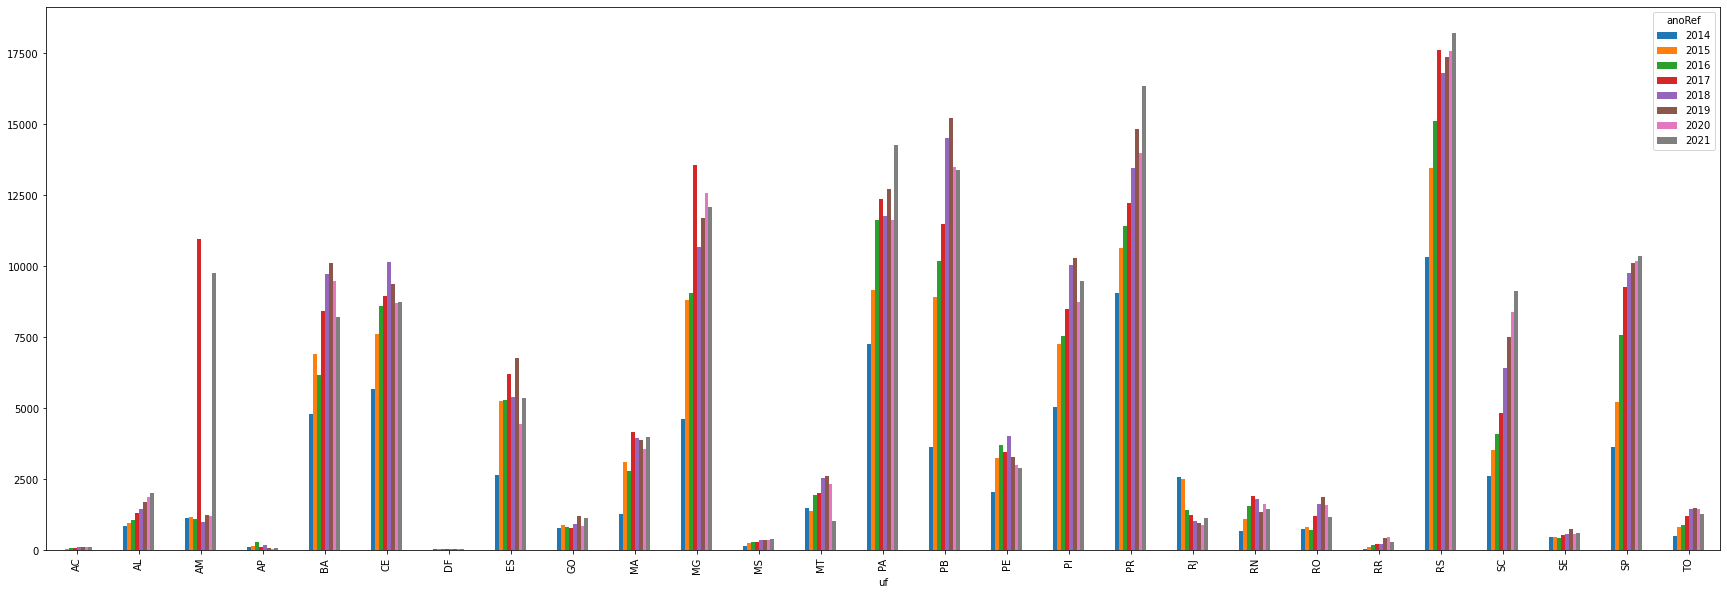

In [52]:
teste.plot(kind="bar", figsize=(30,10))
plt.show()